# Итоговая работа.

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import scipy.stats as sts
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [61]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])


**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [62]:
# a)
user_similarity = pairwise_distances(raitings, metric='cosine')
df = pd.DataFrame(user_similarity)
df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.173971,0.150785,0.216599,0.180824,0.258815,0.272642,0.190325,0.089340,0.139892
1,0.173971,0.000000,0.187657,0.153647,0.128619,0.172869,0.173703,0.199740,0.174737,0.180319
2,0.150785,0.187657,0.000000,0.153306,0.216057,0.209020,0.323838,0.237104,0.178879,0.081269
3,0.216599,0.153647,0.153306,0.000000,0.308466,0.213342,0.167258,0.170653,0.222933,0.141131
4,0.180824,0.128619,0.216057,0.308466,0.000000,0.223557,0.217995,0.187631,0.120515,0.154252
5,0.258815,0.172869,0.209020,0.213342,0.223557,0.000000,0.259882,0.155483,0.193771,0.144851
6,0.272642,0.173703,0.323838,0.167258,0.217995,0.259882,0.000000,0.173308,0.188700,0.208453
7,0.190325,0.199740,0.237104,0.170653,0.187631,0.155483,0.173308,0.000000,0.201872,0.163178
8,0.089340,0.174737,0.178879,0.222933,0.120515,0.193771,0.188700,0.201872,0.000000,0.099062
9,0.139892,0.180319,0.081269,0.141131,0.154252,0.144851,0.208453,0.163178,0.099062,0.000000


In [63]:
res = df[df > 0].idxmin(axis=1)

print("10 пар наиболее похожих пользователей:")
for index, val in res.iteritems():
    print((index, val))

10 пар наиболее похожих пользователей:
(0, 8)
(1, 4)
(2, 9)
(3, 9)
(4, 8)
(5, 9)
(6, 3)
(7, 5)
(8, 0)
(9, 2)


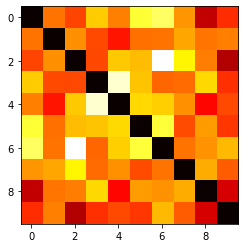

In [64]:
plt.imshow(user_similarity, cmap='hot', interpolation='nearest')
plt.show()

In [65]:
# b)
pca = PCA(n_components=5)
pca.fit(raitings)
pca.transform(raitings)

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [66]:
from sympy import diff, symbols, cos, sin, tan
from scipy.misc import derivative


In [67]:
def f(x):
    return np.tan(np.sin(x) + np.cos(2 * x + 3)) ** 2

x0 = 1
print(f'Значение производной в точке x0={x0}: {derivative(f, 1.0, dx=1e-6)}')

Значение производной в точке x0=1: 55.3859176464222


In [68]:
x = symbols('x')
y = tan(sin(x) + cos(2 * x + 3)) ** 2
yprime = diff(y)
print(yprime)
print(f'Значение производной в точке x0={x0}: {yprime.evalf(subs={x:1})}')

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
Значение производной в точке x0=1: 55.3859176353379


## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [69]:
from scipy.optimize import differential_evolution, minimize

In [70]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [71]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [72]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

In [73]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [74]:
bounds = [(-10,10), (-10,10)]

result1 = differential_evolution(
    func=error, strategy='best1bin', popsize=3, tol=0.01, atol=0, mutation=(0.5, 1), 
    recombination=0.7, updating='deferred', bounds=bounds, seed=42)
    
result1   

     fun: 236.98567692805145
     jac: array([ 1.11212444, 19.56070709])
 message: 'Optimization terminated successfully.'
    nfev: 276
     nit: 1
 success: True
       x: array([ 2.31160874, -0.95860807])

In [75]:
bounds = [(-10,10), (-10,10)]

result1 = differential_evolution(func=error, strategy='best1bin', bounds=bounds)
result1

     fun: 1.5140124229873209e-06
 message: 'Optimization terminated successfully.'
    nfev: 2193
     nit: 70
 success: True
       x: array([ 3. , -2.5])

In [76]:
a = result1.x[0]
b = result1.x[1]

 # Вывод результатов:
print('a =', a)
print('b =', b)

a = 3.0000000003006733
b = -2.4999999999400444


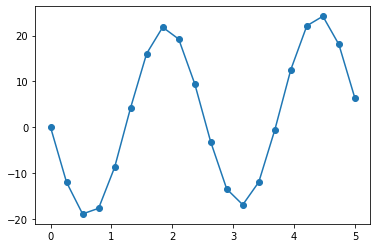

In [77]:
plt.scatter(x, fx)
plt.plot(x, f(x, a, b))

In [78]:
res = minimize(error, result1.x, method='COBYLA', options={'xtol': 1e-6, 'disp': True})
res

D:\Python\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:625: OptimizeWarning: Unknown solver options: xtol
  return _minimize_cobyla(fun, x0, args, constraints, **options)


     fun: 0.06516911854566221
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 25
  status: 1
 success: True
       x: array([ 3.00000151, -2.49990001])

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [79]:
rv = np.random.randint(0, 50, size = 20)
rv

array([23, 37, 42, 23, 23, 11, 37, 40,  1, 20, 37, 37, 44,  9,  5, 29, 19,
        8, 13, 33])

In [80]:
mean = []
sub_sample_size = 20
loc, scale = 0., 1.

for i in range(1000):
    s = np.random.laplace(loc, scale, sub_sample_size)
    mean.append(s.mean())

(array([ 2.,  2.,  1.,  4.,  4.,  5.,  4., 13.,  9., 11., 17., 19., 29.,
        27., 41., 32., 45., 46., 42., 54., 46., 63., 59., 48., 43., 39.,
        44., 50., 44., 32., 30., 21., 14., 11., 15., 10.,  5.,  7.,  3.,
         4.,  0.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([-0.92049433, -0.87818169, -0.83586905, -0.79355641, -0.75124377,
        -0.70893112, -0.66661848, -0.62430584, -0.5819932 , -0.53968056,
        -0.49736792, -0.45505528, -0.41274264, -0.37043   , -0.32811736,
        -0.28580472, -0.24349208, -0.20117944, -0.15886679, -0.11655415,
        -0.07424151, -0.03192887,  0.01038377,  0.05269641,  0.09500905,
         0.13732169,  0.17963433,  0.22194697,  0.26425961,  0.30657225,
         0.3488849 ,  0.39119754,  0.43351018,  0.47582282,  0.51813546,
         0.5604481 ,  0.60276074,  0.64507338,  0.68738602,  0.72969866,
         0.7720113 ,  0.81432394,  0.85663658,  0.89894923,  0.94126187,
         0.98357451,  1.02588715,  1.06819979,  1.11051243,

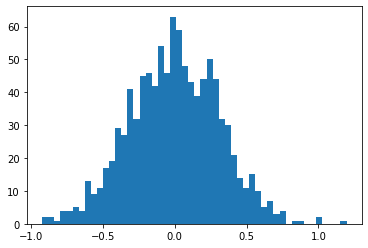

In [81]:
plt.hist(mean, 50, label='mean distribution')

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):



```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```



In [82]:
m = np.array([[1, 4],
              [1, 1]])
m

array([[1, 4],
       [1, 1]])

In [83]:
w,v = np.linalg.eig(m)
print('собственные значения', w)
print('собственные вектора', v)

собственные значения [ 3. -1.]
собственные вектора [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


Вычислим в ручную

## Сначала найдём собственные значения

$$\begin{pmatrix} 1 & 4 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = \lambda \begin{pmatrix} x \\ y \end{pmatrix}$$

$$\begin{pmatrix} x & 4y \\ x & y \end{pmatrix} = \begin{pmatrix} \lambda x \\ \lambda y \end{pmatrix}$$

\begin{equation}
\left\{
\begin{array}{c}
    x+4y=\lambda x \\
    x+y=\lambda y
\end{array}
\right.
\end{equation}

\begin{equation}
\left\{
\begin{array}{c}
    x+4y-\lambda x=0 \\
    x+y-\lambda y=0
\end{array}
\right.
\end{equation}

\begin{equation}
\left\{
\begin{array}{c}
    (1 -\lambda )x+4y=0 \\
    x+(1 -\lambda )y=0
\end{array}
\right.
\end{equation}

По определению, собственный вектор не может быть нулевым, поэтому нас не устраивает тривиальное решение x = 0, y = 0 системы. Следовательно, уравнения линейно зависимы и определитель матрицы системы равен нулю:

$$\begin{bmatrix} 1-\lambda & 4 \\ 1 & 1-\lambda \end{bmatrix} = 0$$

Составим характеристическое уравнение, раскроем определитель и решим квадратное уравнение:

$$(1-\lambda)(1-\lambda)-1\cdot 4=0$$

$$\lambda ^{2}-2\lambda-3=0$$

$$D = 4-4\cdot 1\cdot (-3) = 16$$

$$\sqrt{16}=4$$

$$\lambda_1 = \left(\frac{2 - 4}{2}\right)=-1$$

$$\lambda_2 = \left(\frac{2 + 4}{2}\right)=3$$

Таким образом, собственные значения: $\lambda_1 = -1, \lambda_1 = 3$

## Теперь найдём собственные векторы

Рассмотрим собственное число $\lambda_1 = -1$ и подставим значение в систему уравнений, найденную выше

$$\begin{equation} \left\{ \begin{array}{c} (1 -\lambda )x+4y=0 \\ x+(1 -\lambda )y=0 \end{array} \right. \end{equation}$$

$$\begin{equation} \left\{ \begin{array}{c} 2x+4y=0 \\ x+2y=0 \end{array} \right. \end{equation} \Rightarrow x=-2y$$

Придавая переменной $y$ (либо $x$) произвольные значения, мы получаем бесконечно много собственных векторов. Все они будут коллинеарны друг другу, и поэтому нам достаточно указать один из них.

$$y = -1 \\ x = 2$$